In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df = pd.read_csv('incomeData.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [125]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
for col in df.columns:
    print(col, df[col].unique(),type(df[col][0]))

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] <class 'numpy.int64'>
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] <class 'str'>
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302] <class 'numpy.int64'>
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] <class 'str'>
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] <class 'numpy.int64'>
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] <class 'str'>
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Pr

In [10]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [13]:
df['Income'].unique()  

array([' <=50K', ' >50K'], dtype=object)

In [14]:
df.describe()   

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [17]:
len(df['fnlwgt'].value_counts())

21648

(array([3.033e+03, 3.998e+03, 6.086e+03, 8.355e+03, 4.436e+03, 2.536e+03,
        1.875e+03, 1.071e+03, 5.520e+02, 2.580e+02, 1.390e+02, 8.000e+01,
        4.200e+01, 3.600e+01, 2.400e+01, 1.000e+01, 5.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  12285.        ,   61365.66666667,  110446.33333333,
         159527.        ,  208607.66666667,  257688.33333333,
         306769.        ,  355849.66666667,  404930.33333333,
         454011.        ,  503091.66666667,  552172.33333333,
         601253.        ,  650333.66666667,  699414.33333333,
         748495.        ,  797575.66666667,  846656.33333333,
         895737.        ,  944817.66666667,  993898.33333333,
        1042979.        , 1092059.66666667, 1141140.33333333,
        1190221.        , 1239301.66666667, 1288382.33333333,
        1337463.        , 1386543.66666667, 1435624.33333333,
        

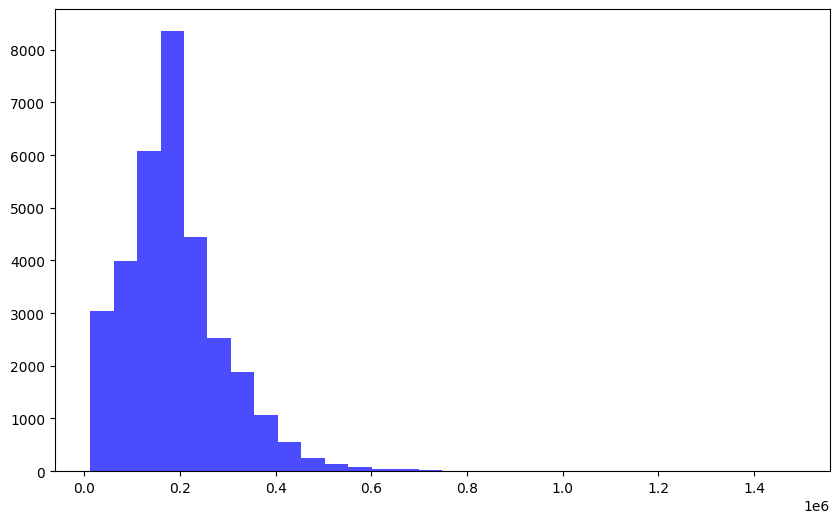

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df['fnlwgt'], bins=30, color='blue', alpha=0.7)

(array([1.657e+03, 1.473e+03, 2.440e+03, 1.626e+03, 2.515e+03, 1.749e+03,
        2.589e+03, 1.774e+03, 1.685e+03, 2.418e+03, 1.550e+03, 2.195e+03,
        1.251e+03, 1.774e+03, 9.420e+02, 8.340e+02, 1.090e+03, 6.670e+02,
        7.880e+02, 3.860e+02, 4.210e+02, 1.970e+02, 1.390e+02, 1.600e+02,
        7.500e+01, 6.700e+01, 3.200e+01, 1.900e+01, 2.000e+00, 4.600e+01]),
 array([17.        , 19.43333333, 21.86666667, 24.3       , 26.73333333,
        29.16666667, 31.6       , 34.03333333, 36.46666667, 38.9       ,
        41.33333333, 43.76666667, 46.2       , 48.63333333, 51.06666667,
        53.5       , 55.93333333, 58.36666667, 60.8       , 63.23333333,
        65.66666667, 68.1       , 70.53333333, 72.96666667, 75.4       ,
        77.83333333, 80.26666667, 82.7       , 85.13333333, 87.56666667,
        90.        ]),
 <BarContainer object of 30 artists>)

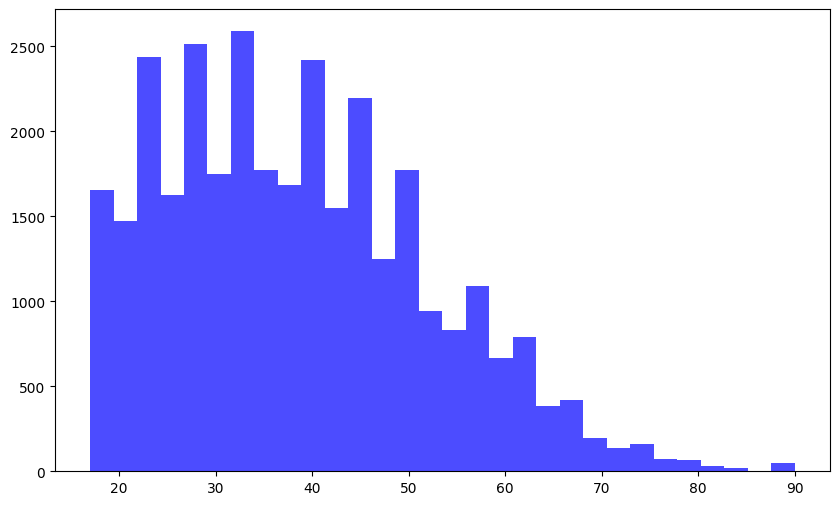

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=30, color='blue', alpha=0.7)

(array([   51.,     0.,   168.,     0.,   333.,     0.,   646.,     0.,
          514.,     0.,   933.,     0.,  1175.,     0.,   433.,     0.,
        10501.,     0.,  7291.,     0.,  1382.,     0.,  1067.,     0.,
         5355.,     0.,  1723.,     0.,   576.,   413.]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
        12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ]),
 <BarContainer object of 30 artists>)

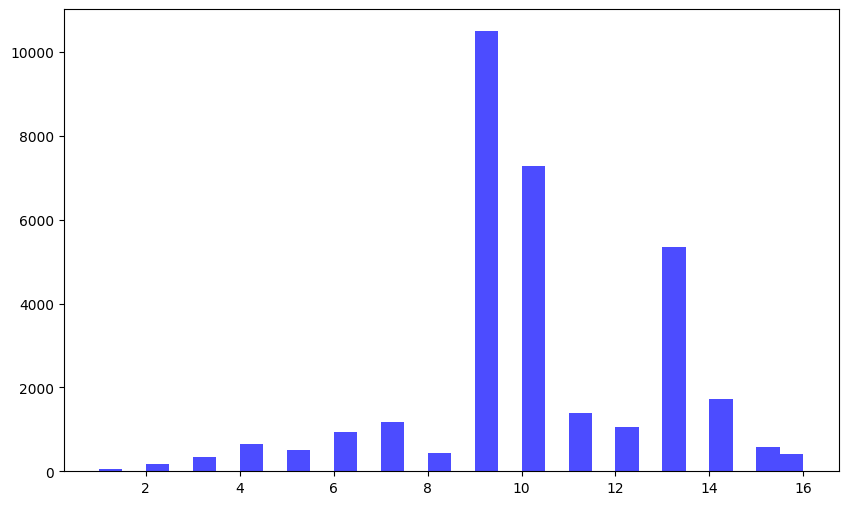

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df['education-num'], bins=30, color='blue', alpha=0.7)

(array([3.0514e+04, 6.1400e+02, 6.6300e+02, 6.3000e+01, 4.5200e+02,
        2.0000e+00, 3.8000e+01, 1.5000e+01, 3.4000e+01, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  3333.3,  6666.6,  9999.9, 13333.2, 16666.5, 19999.8,
        23333.1, 26666.4, 29999.7, 33333. , 36666.3, 39999.6, 43332.9,
        46666.2, 49999.5, 53332.8, 56666.1, 59999.4, 63332.7, 66666. ,
        69999.3, 73332.6, 76665.9, 79999.2, 83332.5, 86665.8, 89999.1,
        93332.4, 96665.7, 99999. ]),
 <BarContainer object of 30 artists>)

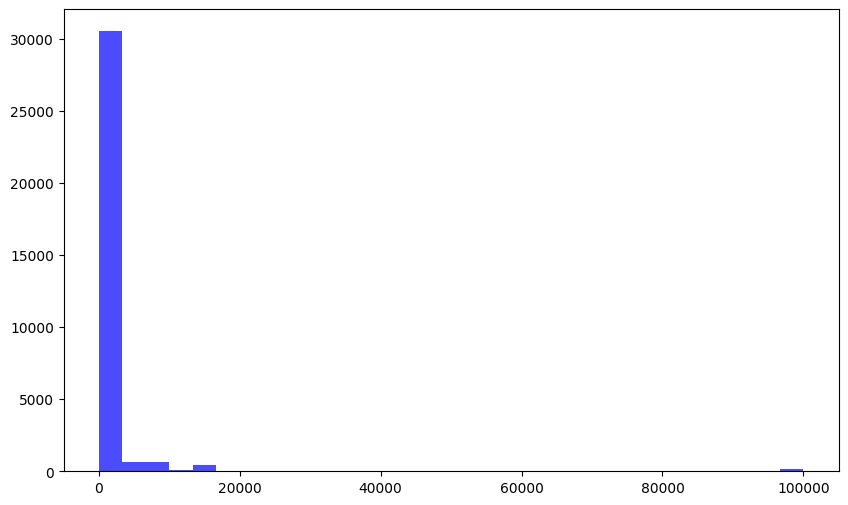

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['capital-gain'], bins=30, color='blue', alpha=0.7)

(array([3.1042e+04, 5.0000e+00, 6.0000e+00, 0.0000e+00, 1.5000e+01,
        2.0000e+00, 8.0000e+00, 9.0000e+00, 4.0000e+00, 3.6000e+01,
        1.6900e+02, 2.5600e+02, 2.7200e+02, 4.5700e+02, 5.0000e+01,
        7.1000e+01, 1.1300e+02, 2.3000e+01, 2.0000e+00, 1.0000e+01,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([   0. ,  145.2,  290.4,  435.6,  580.8,  726. ,  871.2, 1016.4,
        1161.6, 1306.8, 1452. , 1597.2, 1742.4, 1887.6, 2032.8, 2178. ,
        2323.2, 2468.4, 2613.6, 2758.8, 2904. , 3049.2, 3194.4, 3339.6,
        3484.8, 3630. , 3775.2, 3920.4, 4065.6, 4210.8, 4356. ]),
 <BarContainer object of 30 artists>)

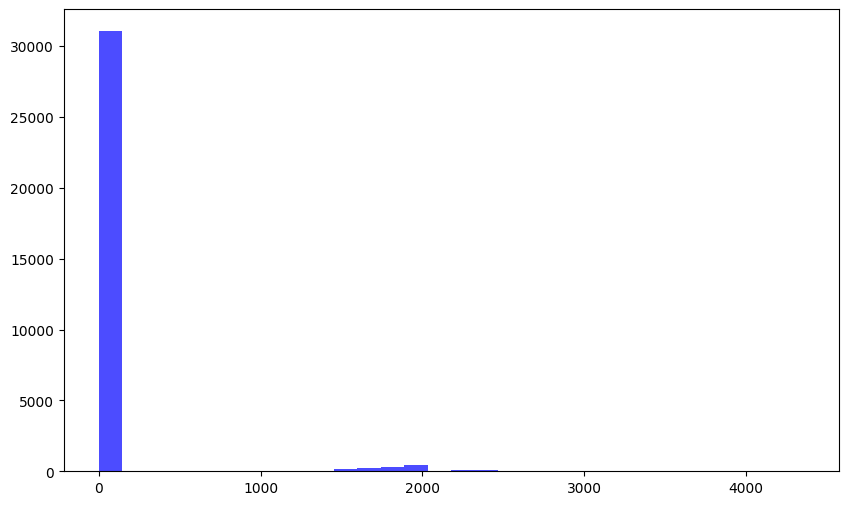

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df['capital-loss'], bins=30, color='blue', alpha=0.7)

<Axes: xlabel='count', ylabel='workclass'>

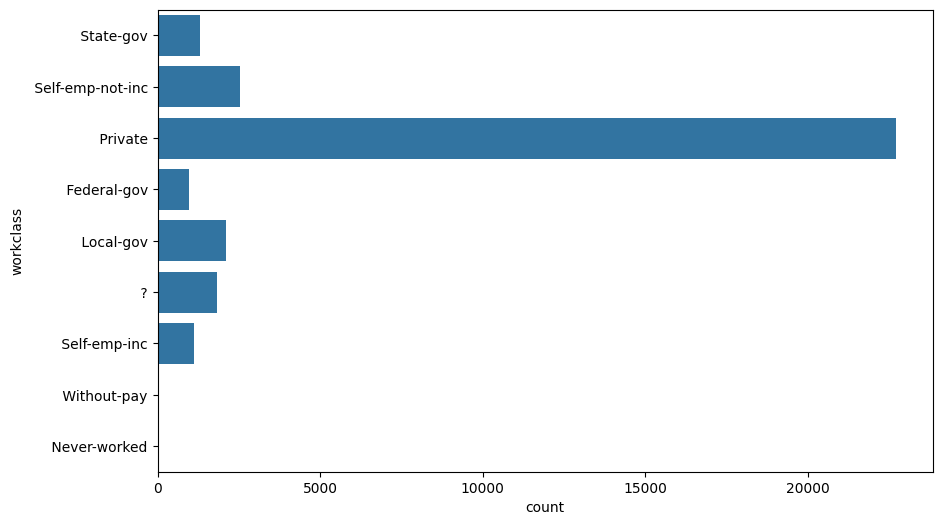

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df['workclass'])

<Axes: xlabel='count', ylabel='education'>

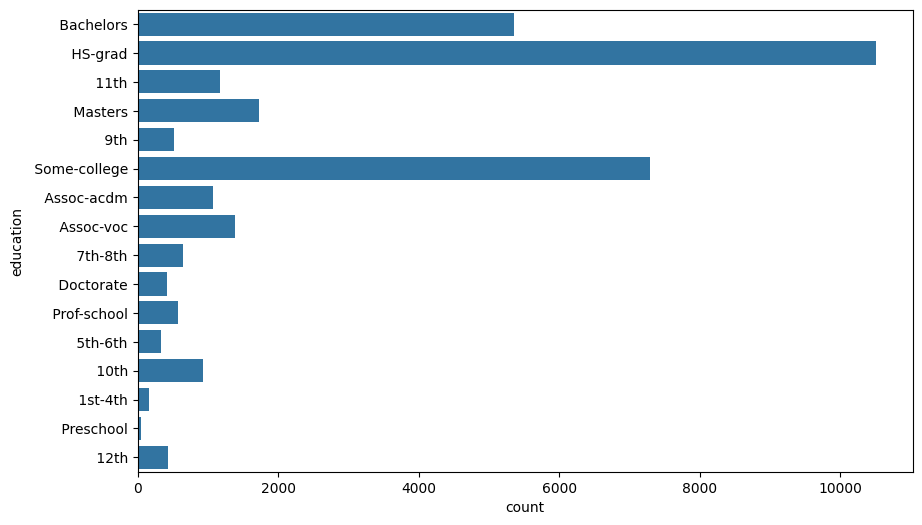

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df['education'])

<Axes: xlabel='count', ylabel='marital-status'>

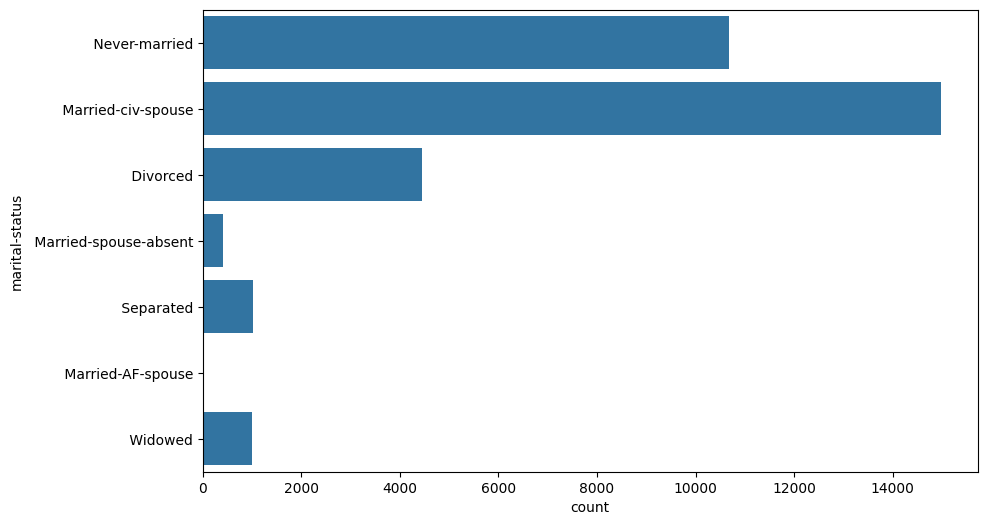

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(df['marital-status'])

<Axes: xlabel='count', ylabel='occupation'>

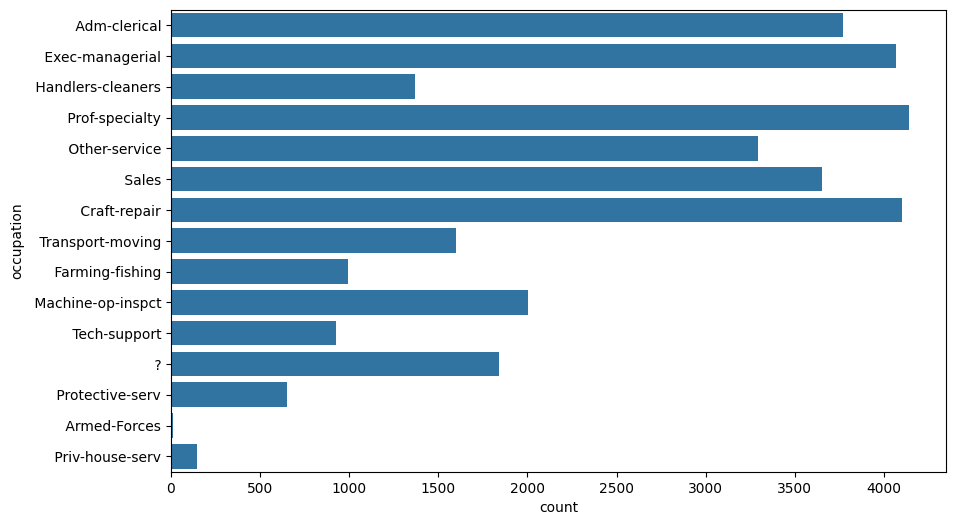

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(df['occupation'])

<Axes: xlabel='count', ylabel='relationship'>

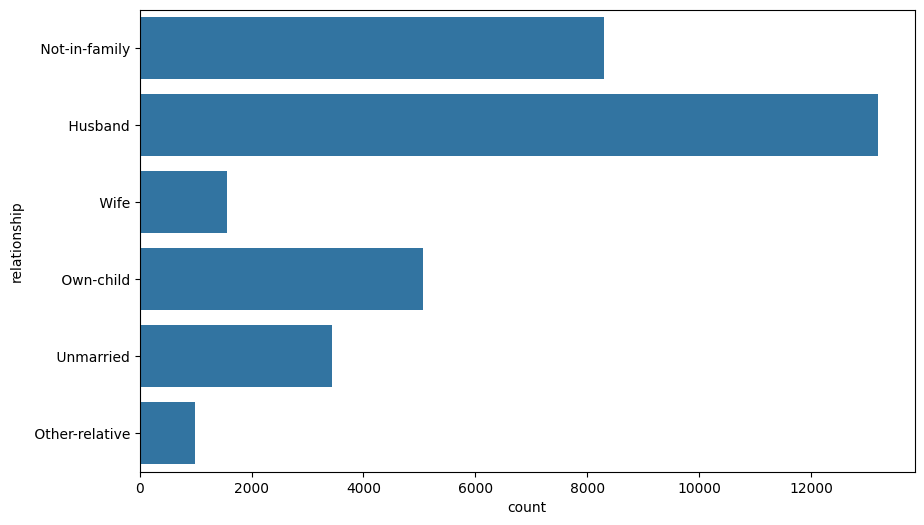

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(df['relationship'])

<Axes: xlabel='count', ylabel='Income'>

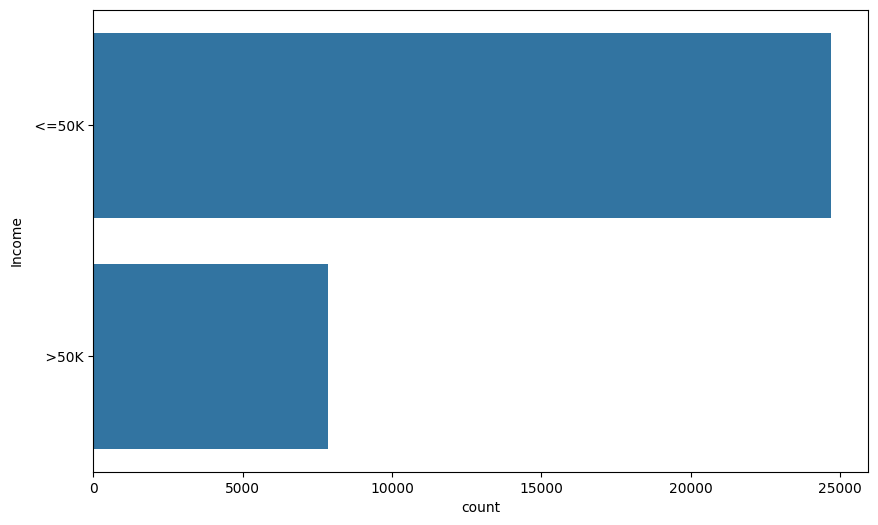

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(df['Income'])

In [31]:
df.replace(' ?', np.nan, inplace=True)

In [32]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [33]:
num_df = df.select_dtypes(include=['int64'])

In [89]:
num_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


<Axes: >

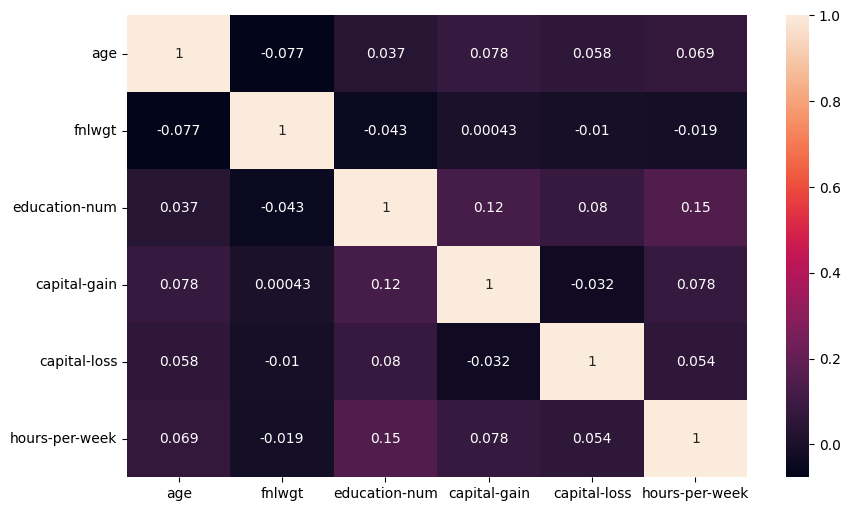

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True)

In [35]:
cat_df = df.select_dtypes(include='object').copy()

In [36]:
cat_df

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [37]:
num_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [47]:
df_cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Income']

In [46]:
df_num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']

In [48]:
for col in df_cat_cols:
    print(col, df[col].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41
Income 2


In [85]:
or_cols = ['workclass', 'marital-status', 'occupation',
       'relationship', 'race', 'sex']

In [80]:
oh_cols = ['native-country']

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [53]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [56]:
df['workclass'] = imputer.fit_transform (df[['workclass']]).reshape(-1)
df['occupation'] = imputer.fit_transform (df[['occupation']]).reshape(-1)
df['native-country'] = imputer.fit_transform (df[['native-country']]).reshape(-1)


In [57]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [58]:
# Making sure that the data doesn't cintain unecessary spaces
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [60]:
cat_df.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Income'],
      dtype='object')

In [62]:
df.drop(columns='education', axis=1,inplace=True)

In [63]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [110]:
X = df.drop(columns='Income', axis=1)

In [111]:
y = df['Income']

In [112]:
y= np.where(y=='>50K', 1,0)

In [108]:
df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [68]:
for i in X:
    print(i, X[i].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eski

In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [90]:
oh_cols = ['native-country']

In [124]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'Income'],
      dtype='object')

In [95]:
num_df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [96]:
num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']

In [82]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [97]:
preprocessor = ColumnTransformer(
                [
                    ("OneHotEncoder", oh_transformer, oh_cols),
                    ("Ordinal_Encoder", ordinal_encoder, or_cols),
                    ("StandardScaler", numeric_transformer,num_cols)
                ]
            )

In [113]:
X_ = preprocessor.fit_transform(X)

In [114]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_, y)

In [115]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((29843, 53), (7461, 53))

In [116]:
X_res.shape

(37304, 53)

In [117]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [118]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [119]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [120]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [121]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9733
- F1 score: 0.9749
- Precision: 0.9721
- Recall: 0.9778
- Roc Auc Score: 0.9730


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9467
- F1 score: 0.9497
- Precision: 0.9495
- Recall: 0.9500
- Roc Auc Score: 0.9464


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9500
- F1 score: 0.9534
- Precision: 0.9465
- Recall: 0.9603
- Roc Auc Score: 0.9493
----------------------------------
Model performance for Test set
- Accuracy: 0.9481
- F1 score: 0.9516
- Precision: 0.9429
- Recall: 0.9603
- Roc Auc Score: 0.9473




c:\Users\Sharif\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.8562
- F1 score: 0.8655
- Precision: 0.8613
- Recall: 0.8697
- Roc Auc Score: 0.8553
----------------------------------
Model performance for Test set
- Accuracy: 0.8574
- F1 score: 0.8660
- Precision: 0.8634
- Recall: 0.8686
- Roc Auc Score: 0.8567


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9852
- F1 score: 0.9862
- Precision: 0.9777
- Recall: 0.9950
- Roc Auc Score: 0.9846
----------------------------------
Model performance for Test set
- Accuracy: 0.9700
- F1 score: 0.9721
- Precision: 0.9583
- Recall: 0.9864
- Roc Auc Score: 0.9689


XGBClassifier
Model performance for Training set
- Accuracy: 0.9830
- F1 score: 0.9841
- Precision: 0.9818
- Recall: 0.9865
- Roc Auc Score: 0.9828
----------------------------------
Model performance for Test set
- Accuracy: 0.9682
- F1 score: 0.9701
- Precision: 0.9676
- Recall: 0.9727
- Roc Auc Score: 0.9679


CatBoosting Classifier
Model performance

c:\Users\Sharif\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.9403
- F1 score: 0.9442
- Precision: 0.9384
- Recall: 0.9501
- Roc Auc Score: 0.9396
----------------------------------
Model performance for Test set
- Accuracy: 0.9402
- F1 score: 0.9440
- Precision: 0.9388
- Recall: 0.9492
- Roc Auc Score: 0.9396




In [122]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.973328
4,K-Neighbors Classifier,0.969977
5,XGBClassifier,0.968235
6,CatBoosting Classifier,0.968101
2,Gradient Boosting,0.948130
1,Decision Tree,0.946656
8,AdaBoost Classifier,0.940222
7,Support Vector Classifier,0.925479
3,Logistic Regression,0.857392
